In [1]:
#EXERCISE 1

import numpy as np

class Perceptron:
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.weights = None
        self.errors_ = []

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])  # bias + weights
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
X = np.array([[2, 3], [1, 1], [4, 5]])  # Features: size, color
y = np.array([1, -1, 1])  # Labels: fiction (+1), non-fiction (-1)

model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)

print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Errors per epoch:", model.errors_)

#QUESTIONS 

# 1. Looking at your labels y = [1, -1, 1], you set 1 = fiction and -1 = non-fiction.
#    So the prediction -1 means the model classifies the book [size=3, color=2] as non-fiction

# 2. The Perceptron made 8 total errors during training.

# 3. By epoch 7, the Perceptron has learned the correct decision boundary for separating the classes.
#Errors drop to 0 because the model is now classifying all training examples correctly.
#This tells us the dataset is linearly separable — meaning a straight line (or hyperplane) can perfectly separate fiction (+1) from non-fiction (-1).



Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 1, 1, 0, 0, 0, 0, 0, 0]


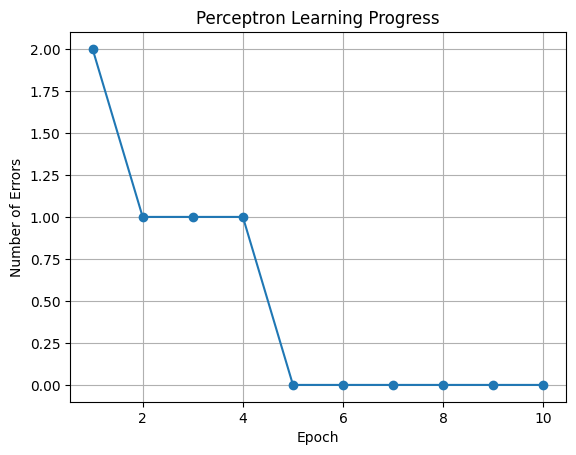

In [2]:
#EXERCISE 2

import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

#QUESTIONS

# 1. They decrease over time, bouncing between 2 and 1 at first, and eventually reach 0 by epoch 7.
# 2. In epoch 7, when the error count first becomes 0.
# 3. Because the perceptron updates its rule after each mistake. Early updates may fix some errors but cause new ones on different books. The rule slowly improves until it finds a rule that works for all books
# 4. All books are classified correctly

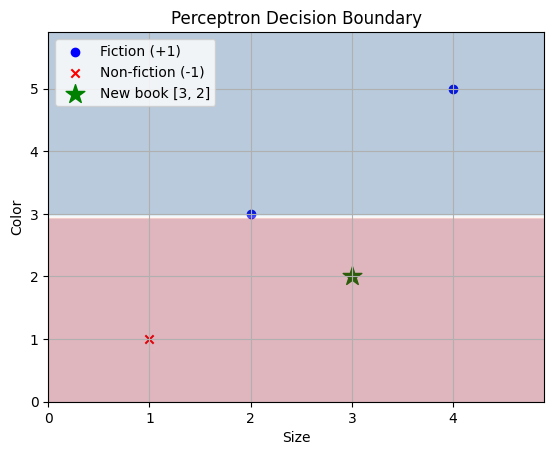

In [3]:
#EXERCISE 3

import matplotlib.pyplot as plt
import numpy as np

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Fiction (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Non-fiction (-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New book [3, 2]')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

#QUESTIONS

# 1. Because it falls on the red side of the decision boundary, which the perceptron learned as the non-fiction region.
# 2. The perceptron drew a straight line that divides the 2D space into two parts. One side contains mostly fiction books (+1), and the other contains non-fiction books (−1).
# 3. [4, 4] would fall in the blue region, so the perceptron would predict +1 (fiction). This is because its size and color values place it on the fiction side of the boundary

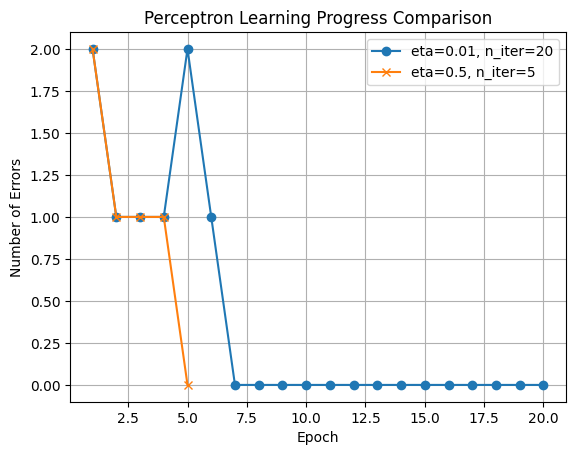

Setting 1 - Prediction for [3, 2]: -1
Setting 1 - Errors per epoch: [2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Setting 2 - Prediction for [3, 2]: -1
Setting 2 - Errors per epoch: [2, 1, 1, 1, 0]


In [5]:
#EXERCISE 4

import matplotlib.pyplot as plt

# Setting 1: eta=0.01, n_iter=20
model1 = Perceptron(eta=0.01, n_iter=20)
model1.fit(X, y)

# Setting 2: eta=0.5, n_iter=5
model2 = Perceptron(eta=0.5, n_iter=5)
model2.fit(X, y)


plt.plot(range(1, len(model1.errors_) + 1), model1.errors_, marker='o', label='eta=0.01, n_iter=20')
plt.plot(range(1, len(model2.errors_) + 1), model2.errors_, marker='x', label='eta=0.5, n_iter=5')

plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress Comparison')
plt.grid(True)
plt.legend()
plt.show()


print("Setting 1 - Prediction for [3, 2]:", model1.predict(np.array([3, 2])))
print("Setting 1 - Errors per epoch:", model1.errors_)

print("Setting 2 - Prediction for [3, 2]:", model2.predict(np.array([3, 2])))
print("Setting 2 - Errors per epoch:", model2.errors_)


Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


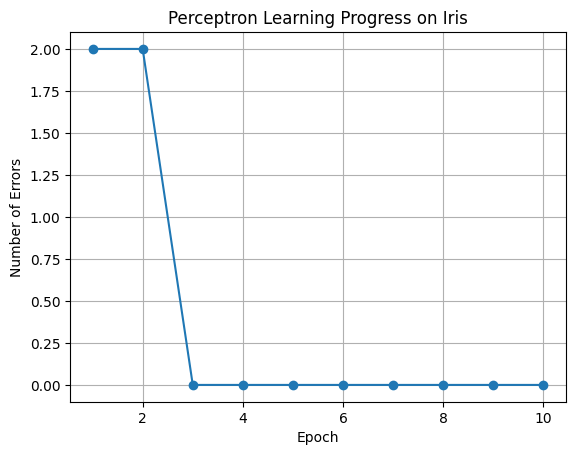

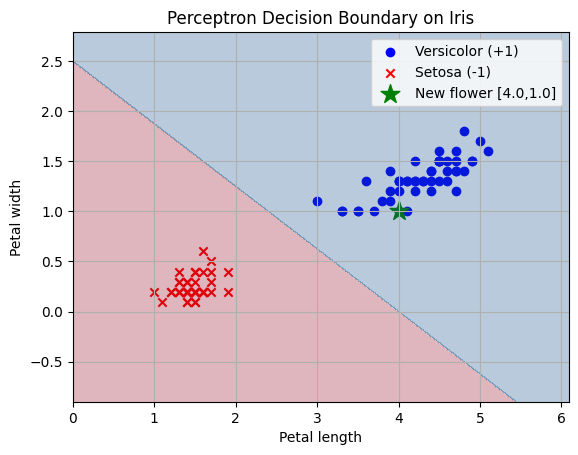

In [6]:
#EXERCISE 5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length, petal width
y = iris.target[:100]         
y = np.where(y == 0, -1, 1)  # -1 = Setosa, 1 = Versicolor


class Perceptron:
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.weights = None
        self.errors_ = []

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# Train model

model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)


# Prediction 

new_flower = np.array([[4.0, 1.0]])
prediction = model.predict(new_flower)
print("Prediction for new flower [4.0, 1.0]:", prediction)
print("Errors per epoch:", model.errors_)


# Plot errors

plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress on Iris')
plt.grid(True)
plt.show()


# Plot decision boundary


plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Versicolor (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Setosa (-1)')
plt.scatter(new_flower[:, 0], new_flower[:, 1], color='green', marker='*', s=200, label='New flower [4.0,1.0]')

# Decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Perceptron Decision Boundary on Iris')
plt.legend()
plt.grid(True)
plt.show()

#QUESTIONS

# 1. After adding the new book [3, 2], the prediction could change depending on where it falls relative to the current decision boundary. The Perceptron adjusts its weights to account for all points, so the boundary may shift slightly.
# 2. The errors list may increase at first because the model has to learn the new point, but if the dataset is still linearly separable, the errors will eventually reach 0.
# 3. Changing the random_state affects the order in which the Perceptron sees the points. This can change the number of errors in early epochs, but for a linearly separable dataset, the final prediction usually stays the same.
